In [1]:
from LogDict import FlashLogDict
import numpy
import matplotlib.pyplot as pyplot
import matplotlib.ticker as mticker
from types import SimpleNamespace

In [2]:
def LogNamespace(logfile):
    logdict = FlashLogDict(logfile, stats=True)
    log = SimpleNamespace(evolution = 0., communication = 0., nucleation = 0., advection = 0.,
                          diffusion = 0., outflow = 0., io = 0., poisson = 0., simtime = 0., walltime = 0., iters=0)

    metric = "avg/proc"
    
    for key in logdict.keys():
        if key == "evolution":
            log.evolution = log.evolution + logdict[key][metric]
        if key == "guardcell internal":
            log.communication = log.communication + logdict[key][metric]
        if key == "Grid_solvePoisson":
            log.poisson = log.poisson + logdict[key][metric]
        #if "sim_heater" in key:
        if key == "sim_heaterCheckSites" or key == "sim_heaterLSReInit" or key == "sim_heaterTagSites":
            log.nucleation = log.nucleation + logdict[key][metric]
        if "advection" in key:
            log.advection = log.advection + logdict[key][metric]
        if "diffusion" in key:
            log.diffusion = log.diffusion + logdict[key][metric]
        if key == "sim_outletSetForcing":
            log.outflow = log.outflow + logdict[key][metric]
        if key == "IO_output":
            log.io = log.io + logdict[key][metric]
            
    return log

In [3]:
SummitNodes25 = LogNamespace("../../simulation/FlowBoiling/Example3D/jobnode.archive/2023-11-01/INS_Flow_Boiling.log")                              
SummitNodes12 = LogNamespace("../../simulation/FlowBoiling/WeakScaling/nodes12/jobnode.archive/2023-11-01/INS_Flow_Boiling.log")
SummitNodes05 = LogNamespace("../../simulation/FlowBoiling/WeakScaling/nodes05/jobnode.archive/2023-11-01/INS_Flow_Boiling.log")
SummitNodes50 = LogNamespace("../../simulation/FlowBoiling/WeakScaling/nodes50/jobnode.archive/2023-11-01/INS_Flow_Boiling.log")
HPC3 = LogNamespace("./jobnode.archive/hpc3/INS_Pool_Boiling.log")

In [4]:
SummitNodes25.simtime = (7.1136077-5.5005870)*10
SummitNodes25.walltime = round(6000/60/60,1)
SummitNodes25.iters=20698

SummitNodes12.simtime = 1.9132883*10
SummitNodes12.walltime = round(6000/60/60,1)
SummitNodes12.iters=23380

SummitNodes05.simtime = 2.7361400*10
SummitNodes05.walltime = round(6000/60/60,1)
SummitNodes05.iters=27066

SummitNodes50.simtime = (1.6408931-0.4)*10
SummitNodes50.walltime = round(6000/60/60,1)
SummitNodes50.iters=19025

HPC3.simtimes = 1*10
HPC3.walltime = round(19999.007/60/60,1)
HPC3.iters=9634

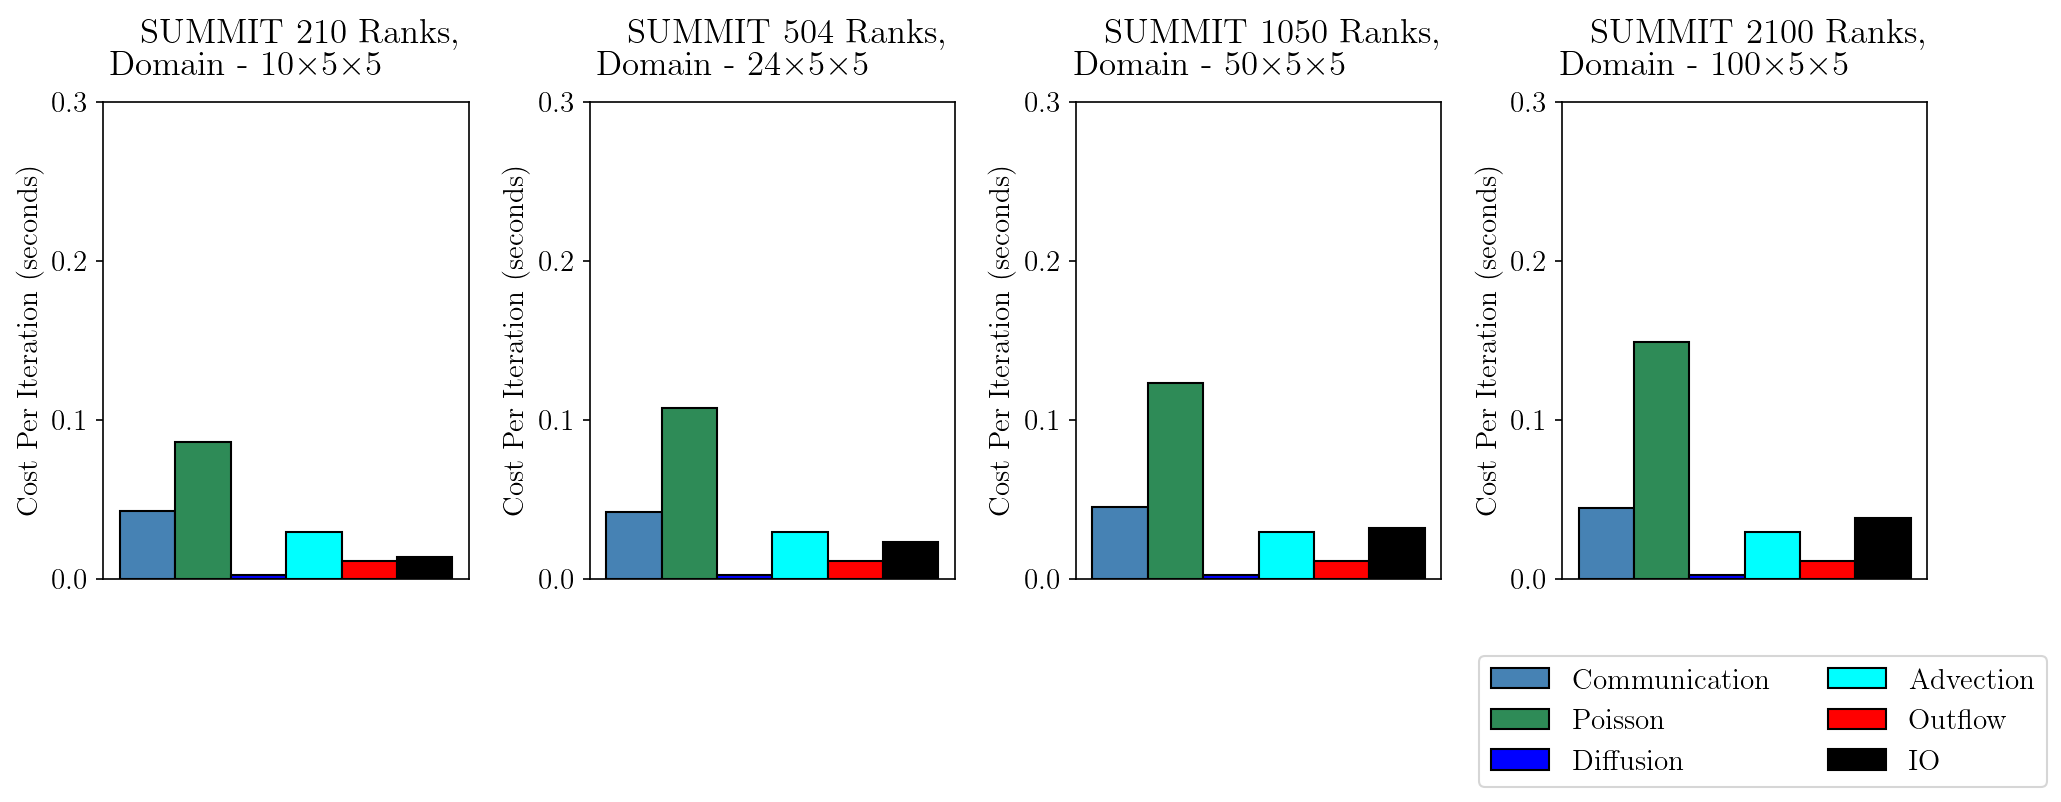

In [5]:
# Plot figure
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)
figure = pyplot.figure(figsize=(14,6), dpi=150)

AxList = figure.subplots(1,4)
Titles = [r"SUMMIT 210 Ranks,$\\$Domain - 10$\times$5$\times$5", 
          r"SUMMIT 504 Ranks,$\\$Domain - 24$\times$5$\times$5",
          r"SUMMIT 1050 Ranks,$\\$Domain - 50$\times$5$\times$5",
          r"SUMMIT 2100 Ranks,$\\$Domain - 100$\times$5$\times$5"]

for ax, log, title  in zip(AxList, [SummitNodes05, SummitNodes12, SummitNodes25, SummitNodes50], Titles):

    labels = ["Communication", "Poisson", "Diffusion", "Advection", "Outflow", "IO"]

    bar = []
    color = iter(["steelblue", "seagreen", "blue", "cyan", "red", "black"])
    x = 0.0
    for lb in labels:
        bar.append(ax.bar(x, (getattr(log,lb.lower())/log.iters), 
                          color=next(color),
                          edgecolor="black", align='center', width=0.05))
        
        x = x+0.05
               
    ax.set_title(title,pad=30)
    ax.get_xaxis().set_visible(False)
    ax.set_ylabel(r"Cost Per Iteration (seconds)")
    ax.set_yticks([0, 0.1, 0.2, 0.3])#, 0.6, 0.7, 0.8])

ax.legend(bar,labels,ncol=2,loc="center",bbox_to_anchor=(0.55, -0.3))
#pyplot.title("Weak Scaling for Flow Boiling Simulation")
pyplot.tight_layout()
pyplot.savefig("/Users/Akash/Desktop/summit01.png")